In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [33]:
# Load the dataset
glass_df = pd.read_excel("C:\\Data science\\Assignments\\glass.xlsx")

# Sheet 1: Description
description_df = pd.read_excel("C:\\Data science\\Assignments\\glass.xlsx", sheet_name='Description')

# Sheet 2: Glass
glass_df = pd.read_excel("C:\\Data science\\Assignments\\glass.xlsx", sheet_name='glass')

# Dataframes ko display karna
print(description_df.head())
print(glass_df.head())


  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [35]:
# 1. Exploratory Data Analysis (EDA)
print(glass_df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [37]:
# Check for data types and missing values
print(glass_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [39]:
# Get summary statistics
print(glass_df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [41]:
# Check for missing values
missing_values = glass_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


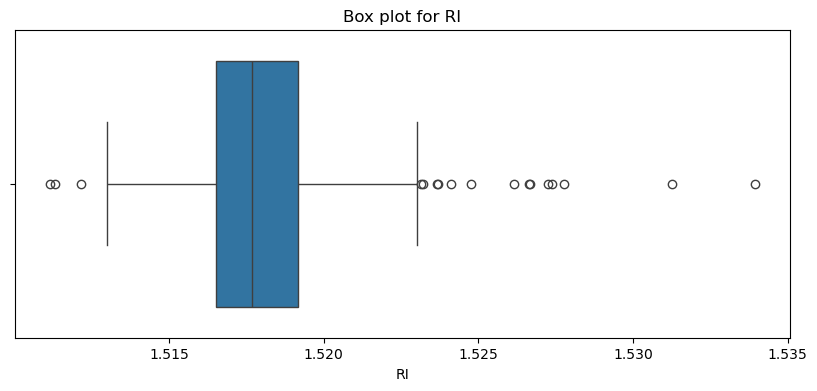

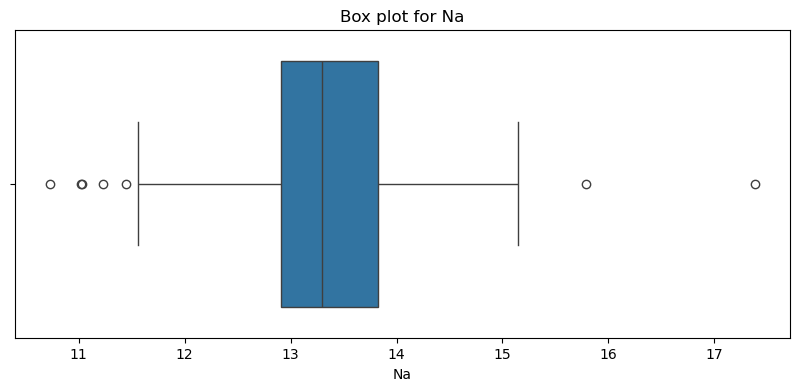

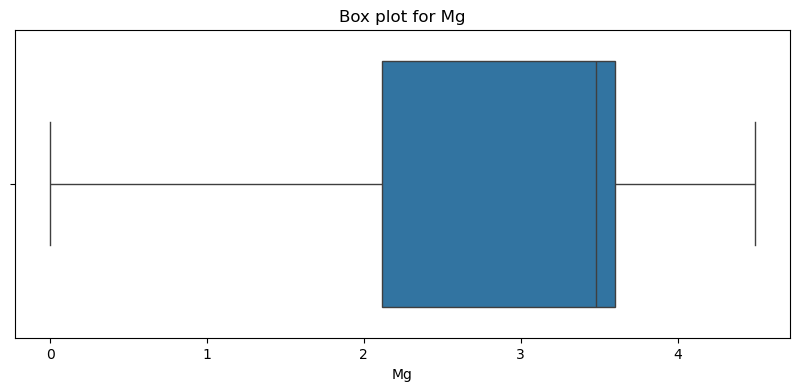

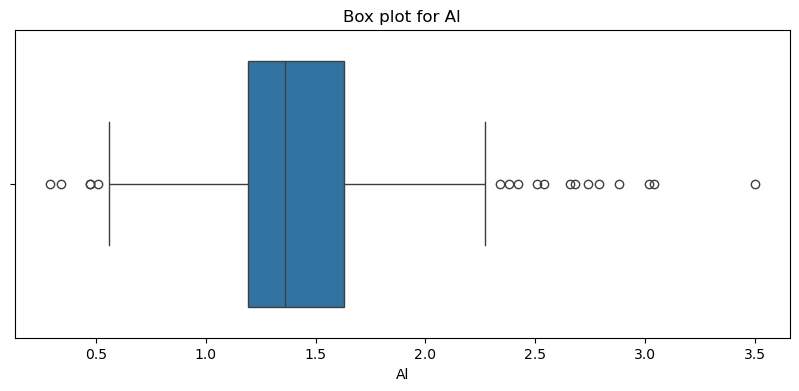

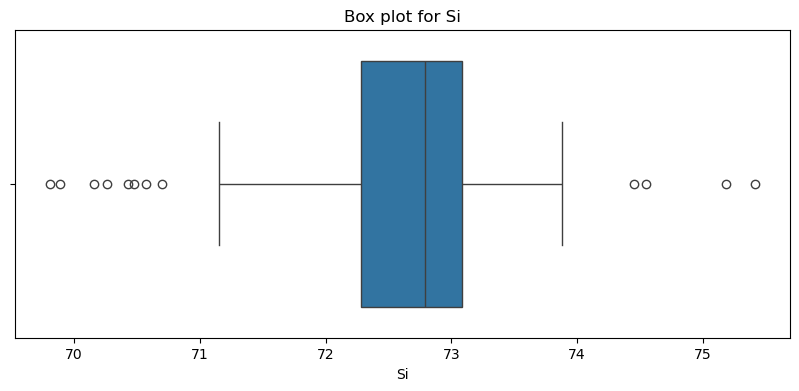

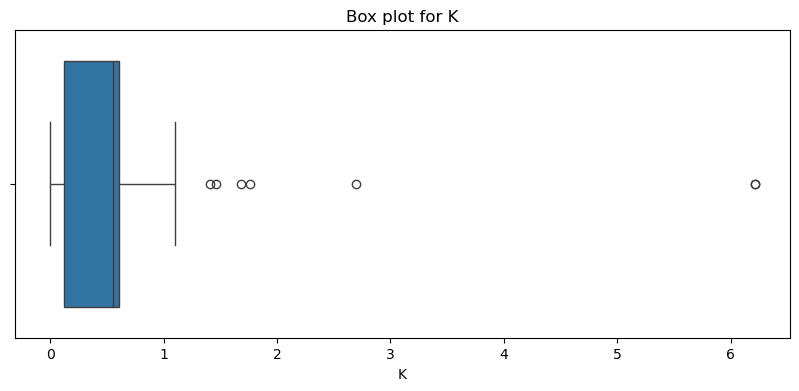

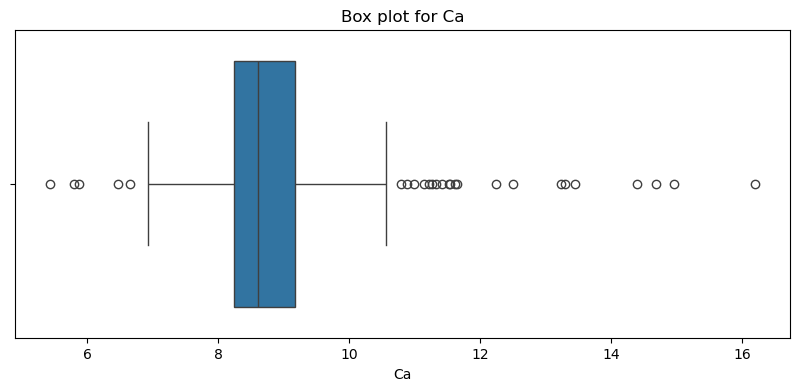

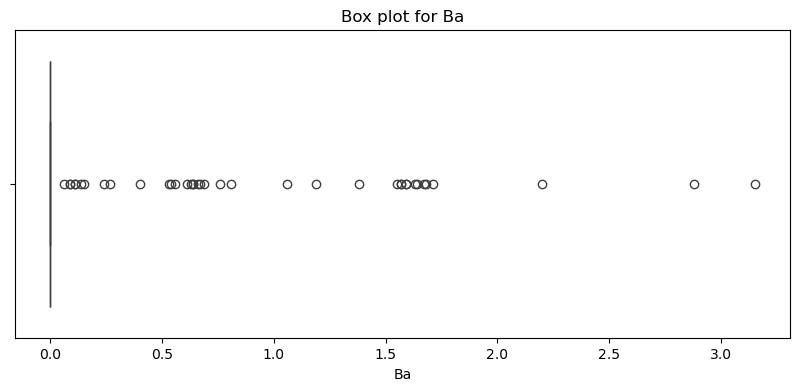

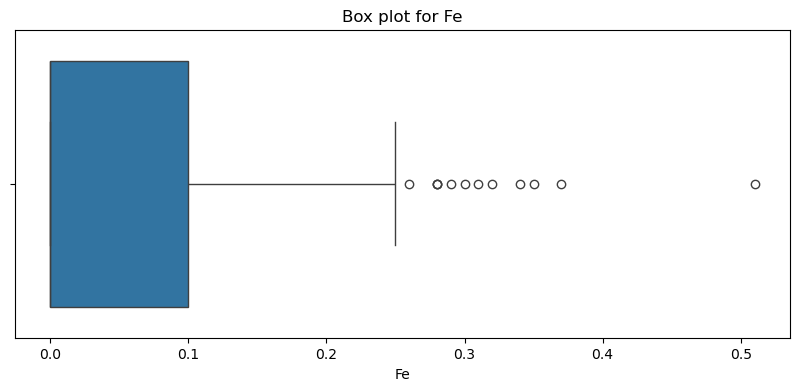

In [43]:
# Create box plots for each feature to check for outliers
for column in glass_df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=glass_df, x=column)
    plt.title(f'Box plot for {column}')
    plt.show()

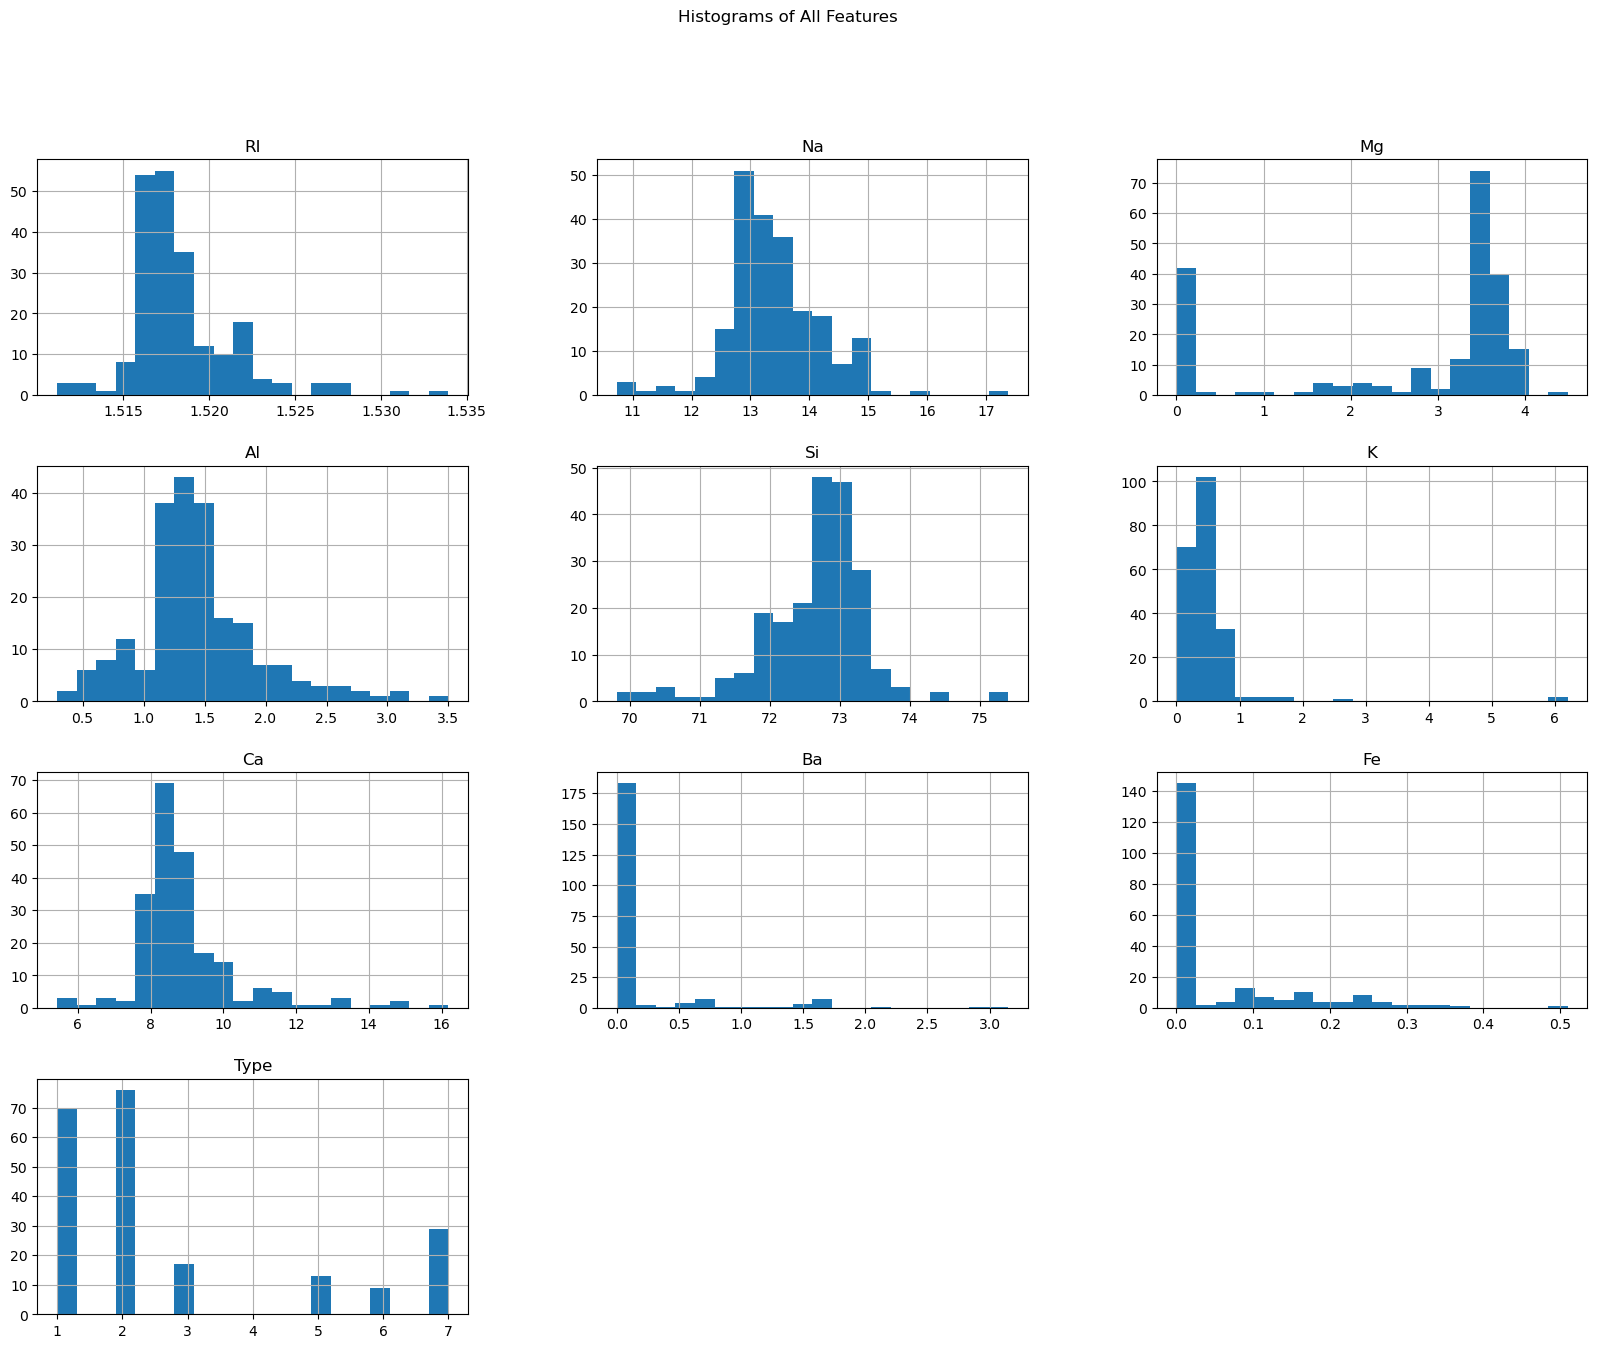

In [45]:
# 2. Data Visualization

# Histograms
glass_df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

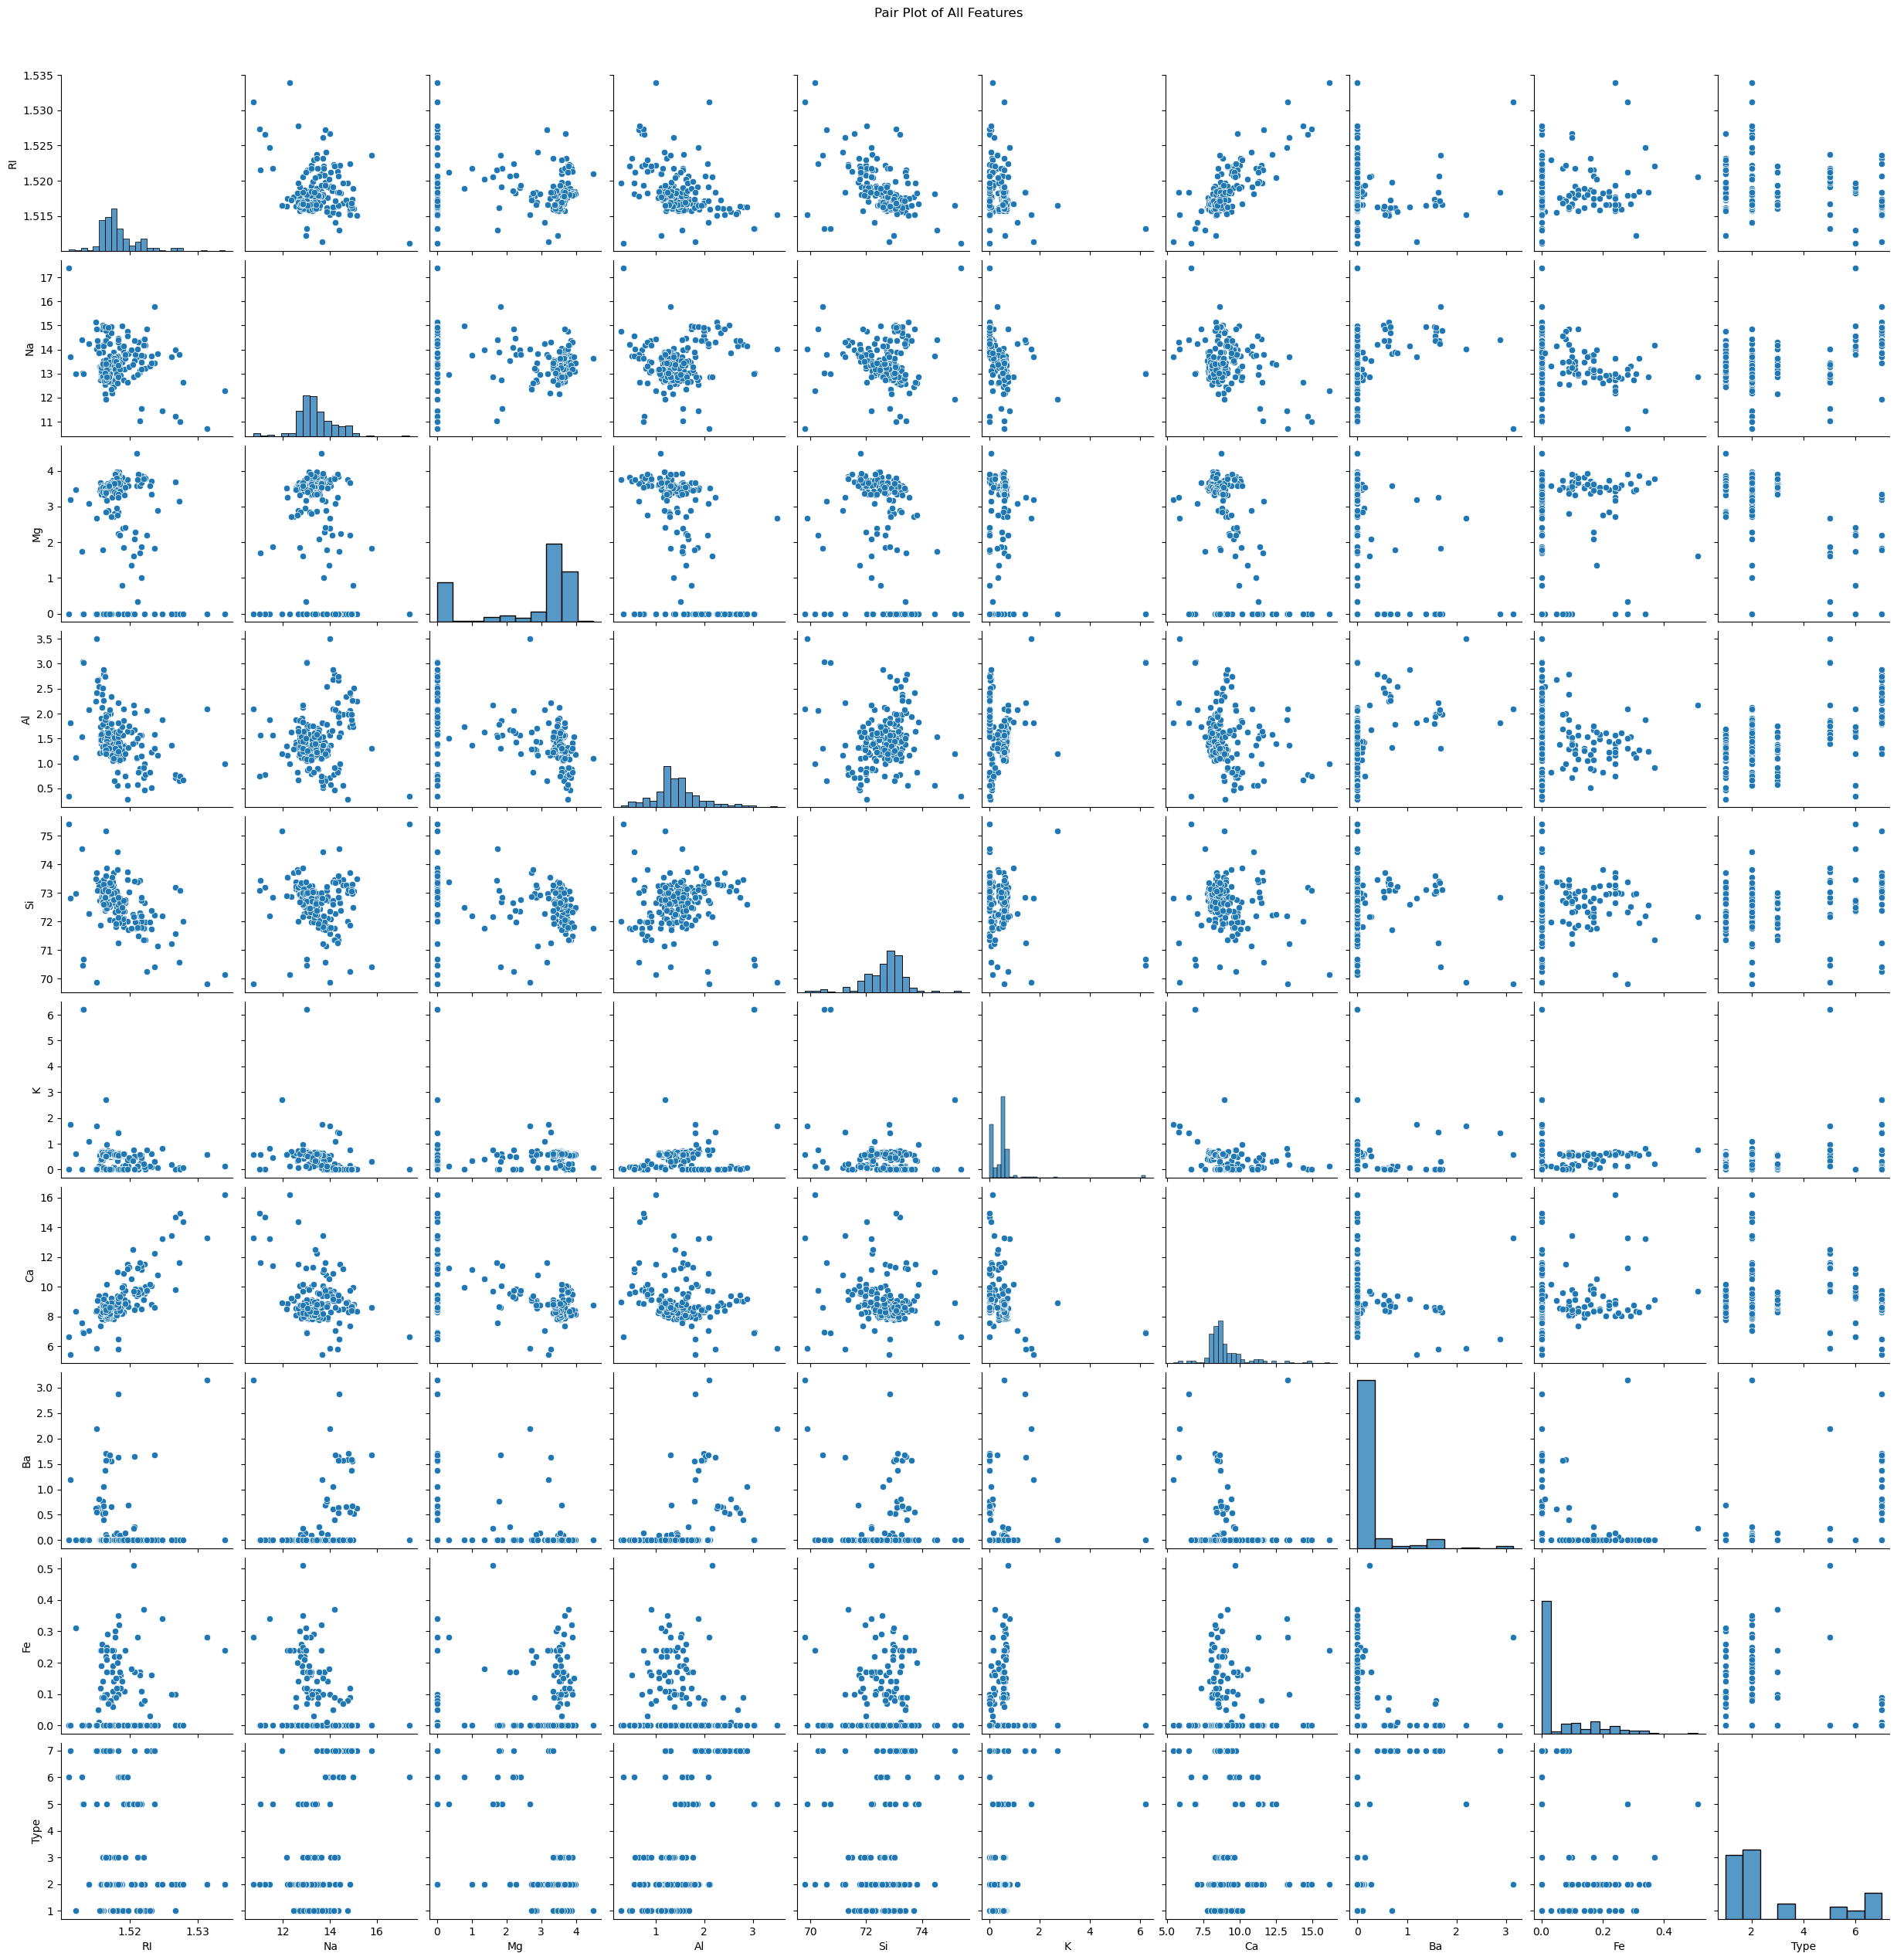

In [47]:
# Pair plot
sns.pairplot(glass_df, diag_kind='hist')
plt.suptitle('Pair Plot of All Features', y=1.02)
plt.show()

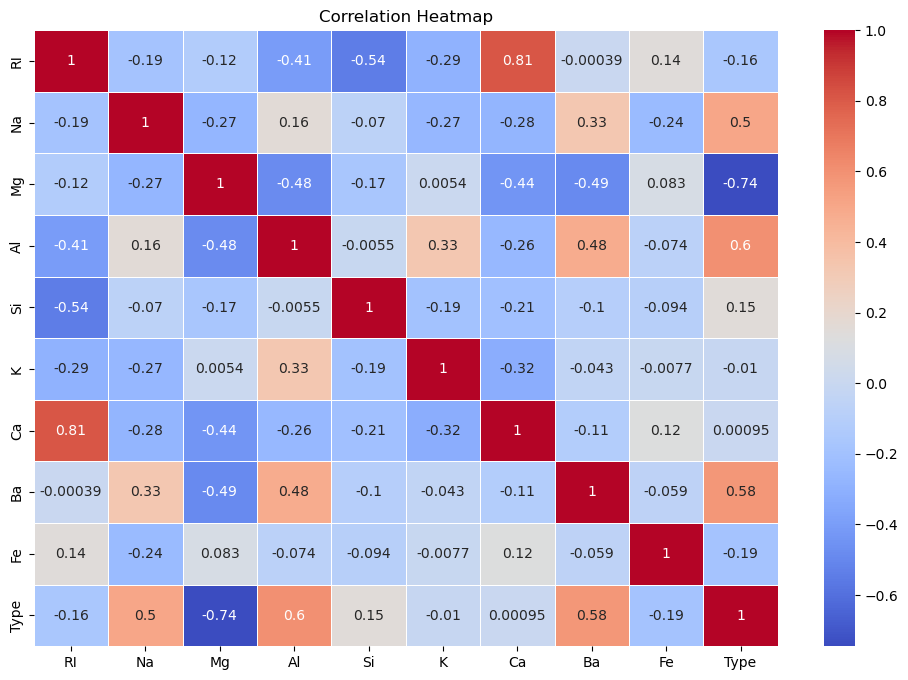

In [49]:
# Correlation heatmap
correlation_matrix = glass_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [51]:
# 3. Data Preprocessing

# Check for missing values and impute if necessary (using mean imputation as an example)
glass_df.fillna(glass_df.mean(), inplace=True)

# Identify categorical variables (none in this dataset, but for general approach)
categorical_cols = glass_df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    glass_df_encoded = pd.get_dummies(glass_df, columns=categorical_cols)
else:
    glass_df_encoded = glass_df.copy()


In [53]:
# Feature Scaling using Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(glass_df_encoded.iloc[:, :-1])  # Exclude the target column
glass_df_scaled = pd.DataFrame(scaled_features, columns=glass_df_encoded.columns[:-1])
glass_df_scaled['Type'] = glass_df_encoded['Type']

In [55]:
# Handling Imbalanced Data using SMOTE
smote = SMOTE()
X, y = smote.fit_resample(glass_df_scaled.iloc[:, :-1], glass_df_scaled['Type'])
X_resampled = pd.DataFrame(X, columns=glass_df_scaled.columns[:-1])
y_resampled = pd.Series(y, name='Type')
glass_df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [57]:
# 4. Random Forest Model Implementation

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [59]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [61]:
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.9022
Precision: 0.9040
Recall: 0.9022
F1-Score: 0.9018

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.80      0.84      0.82        19
           3       0.91      1.00      0.95        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.89      0.94        18

    accuracy                           0.90        92
   macro avg       0.91      0.92      0.91        92
weighted avg       0.90      0.90      0.90        92



In [65]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
# 5. Bagging and Boosting Methods

# Bagging using Random Forest
bagging_classifier = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)

In [68]:
# Boosting using AdaBoost
boosting_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)

C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [69]:
# Evaluate Bagging and Boosting
print("Bagging Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging))

print("Boosting Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boosting):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_boosting))


Bagging Classifier Performance:
Accuracy: 0.9130

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.82      0.82        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00        14
           7       1.00      0.83      0.91        18

    accuracy                           0.91        92
   macro avg       0.91      0.93      0.92        92
weighted avg       0.92      0.91      0.91        92

Boosting Classifier Performance:
Accuracy: 0.4239

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.94      0.52        17
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        10
           5       0.82      1.00      0.90        14
           6       0.00      0.00    

C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeeshan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
